In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from pmdarima import auto_arima

from sklearn.metrics import mean_absolute_error

c:\Users\Utilizador\miniconda3\envs\tsa_course\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
c:\Users\Utilizador\miniconda3\envs\tsa_course\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
c:\Users\Utilizador\miniconda3\envs\tsa_course\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Do

In [2]:
df1 = pd.read_csv(
    r'C:\Users\Utilizador\Desktop\Uni\Estágios\2025 - InnoWave\Solar DG\solar_data\Plant_1_Generation_Data.csv',
    encoding='utf-8',
    engine='python',
    index_col='DATE_TIME'
)

In [3]:
# Get number of lines of last week

def get_last_week(df):
    # Guarantee DATE_TIME is a proper datetime index
    df.index = pd.to_datetime(df.index, format='%d-%m-%Y %H:%M')

    start_date = df.index.max() - pd.Timedelta(days=7)

    last_week_df = df.loc[start_date:]

    len_last_week = len(last_week_df)

    print(f"Number of rows in the last week: {len_last_week}")

    return len_last_week

In [4]:
len_last_week = get_last_week(df1)

Number of rows in the last week: 14762


In [5]:
train = df1.iloc[:-len_last_week:]
test = df1.iloc[-len_last_week:]

In [6]:
df1.index = pd.to_datetime(df1.index, format='%d-%m-%Y %H:%M')

# Resample to averages in minutes
df_min = df1.resample('min').mean()
df_min = df_min.dropna()

In [7]:
model = auto_arima(df_min['DAILY_YIELD'], seasonal=False)

c:\Users\Utilizador\miniconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
c:\Users\Utilizador\miniconda3\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
c:\Users\Utilizador\miniconda3\envs\tsa_course\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result ei

In [8]:
model.summary()

c:\Users\Utilizador\miniconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 3158
Model:                     ARMA(4, 2)   Log Likelihood              -24735.195
Method:                       css-mle   S.D. of innovations            609.601
Date:                Fri, 22 Aug 2025   AIC                          49486.390
Time:                        11:39:57   BIC                          49534.851
Sample:                             0   HQIC                         49503.776
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3325.9243    111.505     29.828      0.000    3107.379    3544.470
ar.L1.y        3.0085        nan        nan        nan         nan         nan
ar.L2.y       -3.1250        nan        nan        nan         nan         nan
ar.L3.y        1.2196   6.11e-05   1.99e+04      0.000       1.219       1.220
ar.L4.y       -0.1035   4.88e-05  -2121.639      0.000      -0.104      -0.103
ma.L1.y       -1.9673      0.004   -486.609      0.000      -1.975      -1.959
ma.L2.y        0.9713      0.004    239.959      0.000       0.963       0.979
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9989           -0.0659j            1.0010           -0.0105
AR.2            0.9989           +0.0659j            1.0010            0.0105
AR.3            1.1116           -0.0000j            1.1116           -0.0000
AR.4            8.6747           -0.0000j            8.6747           -0.0000
MA.1            1.0127           -0.0625j            1.0147           -0.0098
MA.2            1.0127           +0.0625j            1.0147            0.0098
-----------------------------------------------------------------------------
"""

In [9]:
p, d, q = model.order
print(f"ARIMA order: p={p}, d={d}, q={q}")

ARIMA order: p=4, d=0, q=2


In [10]:
start = len(train)
end = len(train) + len(test) -1

In [12]:
results_arima = ARIMA(df1['DAILY_YIELD'], order = (d, q, p)).fit()

c:\Users\Utilizador\miniconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\Users\Utilizador\miniconda3\envs\tsa_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\Users\Utilizador\miniconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [13]:
results_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.DAILY_YIELD   No. Observations:                68776
Model:                 ARIMA(0, 2, 4)   Log Likelihood             -562963.613
Method:                       css-mle   S.D. of innovations            868.196
Date:                Fri, 22 Aug 2025   AIC                        1125939.227
Time:                        11:40:15   BIC                        1125994.058
Sample:                             2   HQIC                       1125956.152
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.906e-07   3.62e-05     -0.027      0.978    -7.2e-05       7e-05
ma.L1.D2.DAILY_YIELD    -1.8554   4.42e-07  -4.19e+06      0.000      -1.855      -1.855
ma.L2.D2.DAILY_YIELD     1.0878        nan        nan        nan         nan         nan
ma.L3.D2.DAILY_YIELD    -0.3923        nan        nan        nan         nan         nan
ma.L4.D2.DAILY_YIELD     0.1598        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2            1.2321           -0.0000j            1.2321           -0.0000
MA.3            0.1111           -2.2507j            2.2534           -0.2422
MA.4            0.1111           +2.2507j            2.2534            0.2422
-----------------------------------------------------------------------------
"""

In [14]:
predictions_arima = results_arima.predict(start=start, end=end, typ='levels').rename('ARIMA Prediction')

In [15]:
predictions_arima

DATE_TIME
2020-06-10 23:45:00    6491.896628
2020-06-10 23:45:00    6426.896036
2020-06-10 23:45:00    6299.174632
2020-06-10 23:45:00    6468.163643
2020-06-10 23:45:00    6483.855252
                          ...     
2020-06-17 23:45:00    5866.057351
2020-06-17 23:45:00    5867.747672
2020-06-17 23:45:00    5780.707896
2020-06-17 23:45:00    5602.774637
2020-06-17 23:45:00    5757.808595
Name: ARIMA Prediction, Length: 14762, dtype: float64

<AxesSubplot:xlabel='DATE_TIME'>

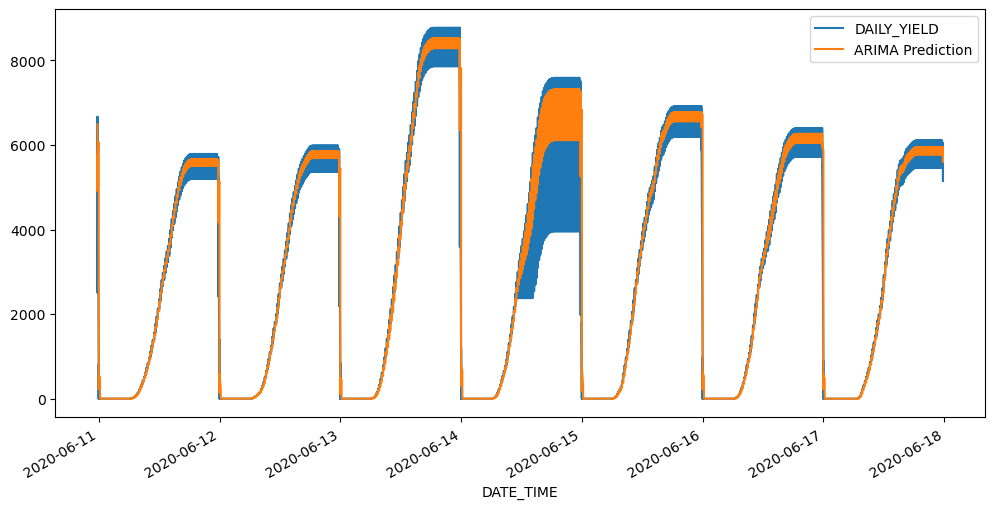

In [16]:
test['DAILY_YIELD'].plot(figsize=(12,6), legend=True)
predictions_arima.plot(legend=True)

In [17]:
test['DAILY_YIELD'].mean()

3200.8839518234954

In [18]:
predictions_arima.mean()

3201.19880272012

In [19]:
mae_arima = mean_absolute_error(test['DAILY_YIELD'], predictions_arima)
print(f"MAE: {mae_arima}")

MAE: 118.30936334780908


In [20]:
error_arima = (mae_arima / test['DAILY_YIELD'].mean()) * 100
accuracy_arima = 100 - error_arima

print(f'Accuracy (ARIMA): {accuracy_arima}%')


Accuracy (ARIMA): 96.30385340023308%
